In [1]:
!pip install datacleaner

  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7422 sha256=890a8912f74dd573ab360d8abd4dd00db3717af4f173242a70b1deabe78ffd3a
  Stored in directory: /Users/aishwarya/Library/Caches/pip/wheels/e0/f9/d4/f8a0f781f327cf5ecff06d08eb423db48944b6171fb113c57c
Successfully built datacleaner


In [2]:
!pip install fasteda

  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4739 sha256=6e1c4e2d9f07545ef9613cf59bda5b754b703ad32895f7a77c0789e56f364ee9
  Stored in directory: /Users/aishwarya/Library/Caches/pip/wheels/93/57/7e/fdc4b9923cf3f1f46de4e2ea7a5a4acb335357f919920ffb7c
Successfully built fasteda


In [3]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import datacleaner
from datacleaner import autoclean
from fasteda import fast_eda

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df = pd.read_csv("/Users/aishwarya/Downloads/walmart-sales-dataset-of-45stores 2.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106


In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000
mean,23.000,1046964.878,0.070,60.664,3.359,171.578,7.999
std,12.988,564366.622,0.255,18.445,0.459,39.357,1.876
min,1.000,209986.250,0.000,-2.060,2.472,126.064,3.879
25%,12.000,553350.105,0.000,47.460,2.933,131.735,6.891
50%,23.000,960746.040,0.000,62.670,3.445,182.617,7.874
75%,34.000,1420158.660,0.000,74.940,3.735,212.743,8.622
max,45.000,3818686.450,1.000,100.140,4.468,227.233,14.313


In [8]:
df = autoclean(df)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,19,1643690.900,0,42.310,2.572,211.096,8.106
1,1,52,1641957.440,1,38.510,2.548,211.242,8.106
2,1,85,1611968.170,0,39.930,2.514,211.289,8.106
3,1,118,1409727.590,0,46.630,2.561,211.320,8.106
4,1,20,1554806.680,0,46.500,2.625,211.350,8.106


DataFrame Head:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,19,1643690.900,0,42.310,2.572,211.096,8.106
1,1,52,1641957.440,1,38.510,2.548,211.242,8.106
2,1,85,1611968.170,0,39.930,2.514,211.289,8.106


DataFrame Tail:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6432,45,55,734464.360,0,54.470,4.000,192.327,8.667
6433,45,88,718125.530,0,56.470,3.969,192.331,8.667
6434,45,121,760281.430,0,58.850,3.882,192.309,8.667


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(6435, 8)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   int64  
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 402.3 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Store,6435,23,23,12.988,1,12,23,34,45,0.000000,-1.201186
Date,6435,71,71,41.283,0,35,71,107,142,0.000000,-1.200117
Weekly_Sales,6435,1046964.878,960746.04,564366.622,209986.25,553350.105,960746.04,1420158.66,3818686.45,0.668206,0.052167
Holiday_Flag,6435,0.07,0,0.255,0,0,0,0,1,3.372712,9.375188
Temperature,6435,60.664,62.67,18.445,-2.06,47.46,62.67,74.94,100.14,-0.336689,-0.613257
Fuel_Price,6435,3.359,3.445,0.459,2.472,2.933,3.445,3.735,4.468,-0.096136,-1.177395
CPI,6435,171.578,182.617,39.357,126.064,131.735,182.617,212.743,227.233,0.063477,-1.839316
Unemployment,6435,7.999,7.874,1.876,3.879,6.891,7.874,8.622,14.313,1.187867,2.636729


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



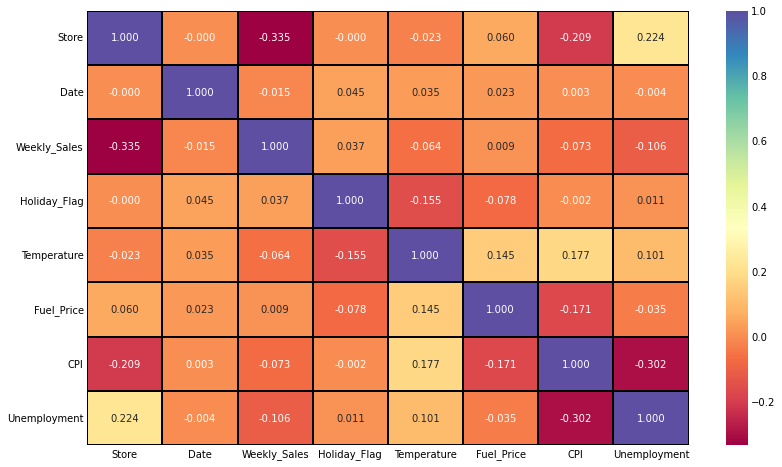

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



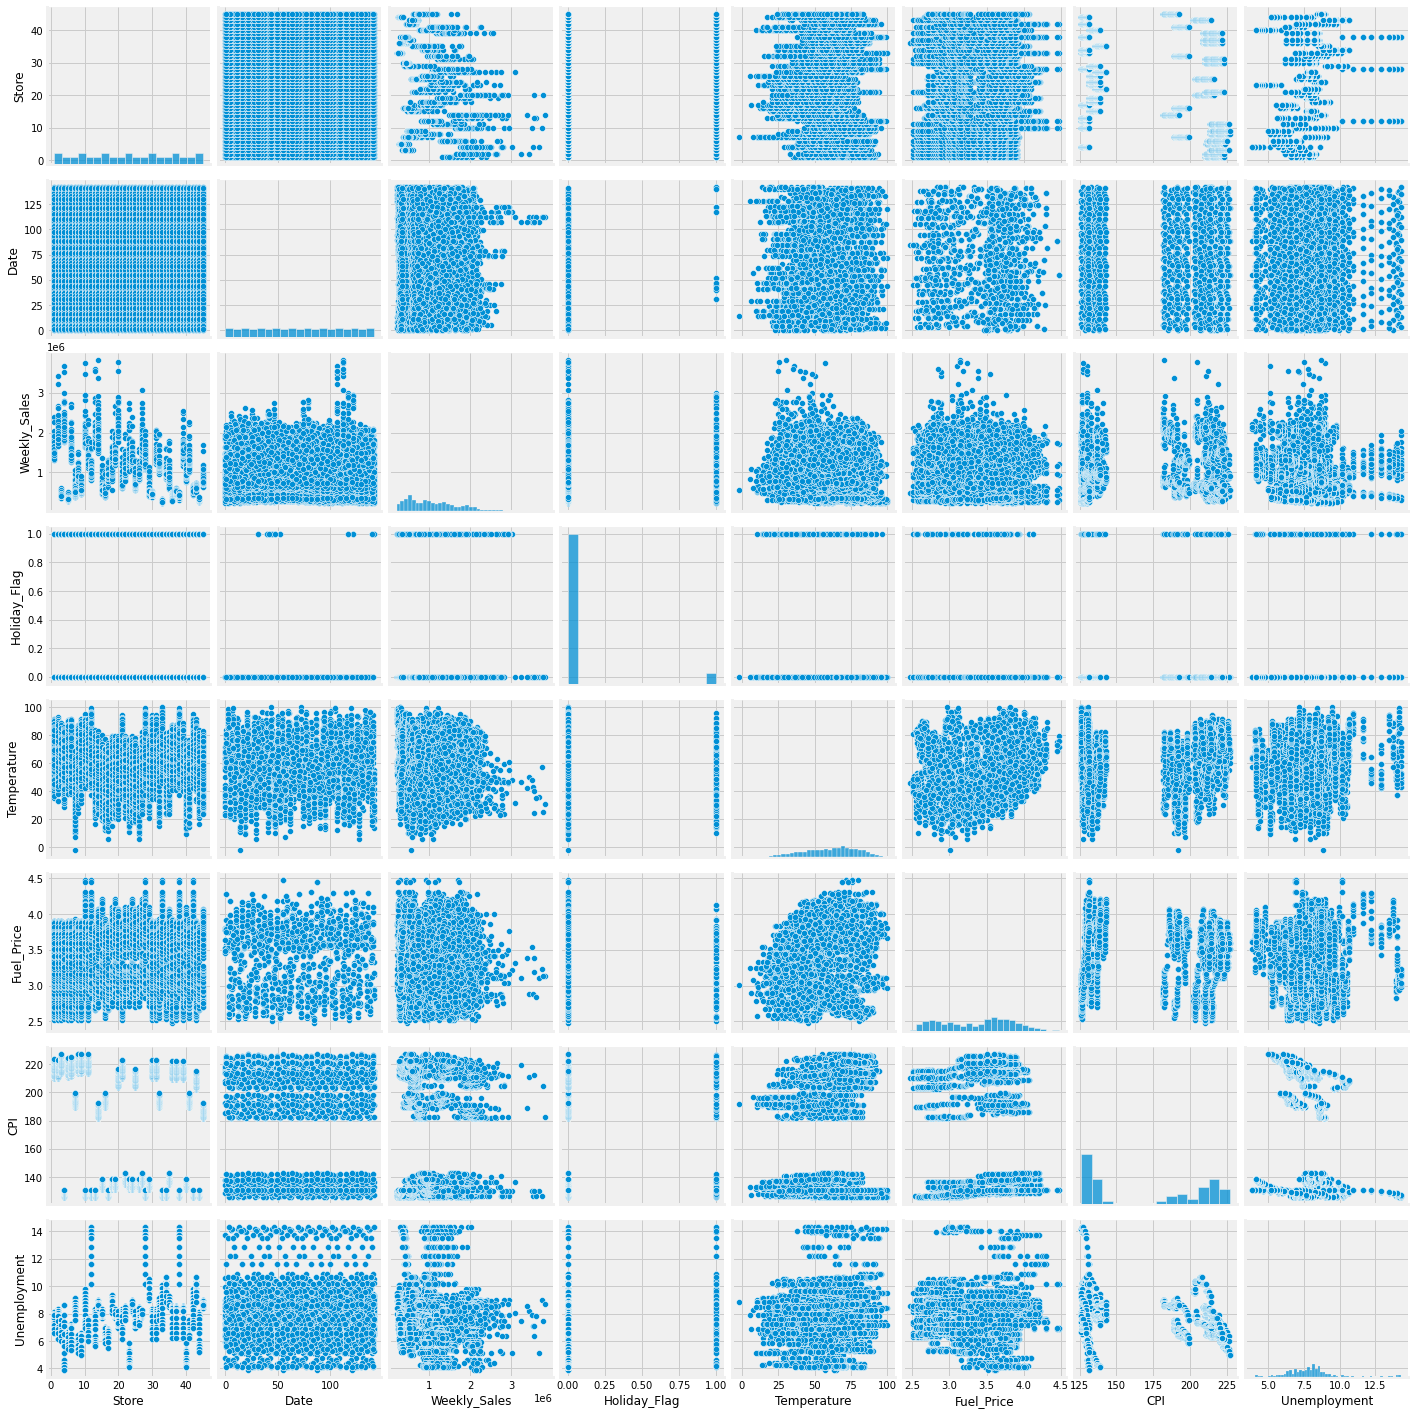

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



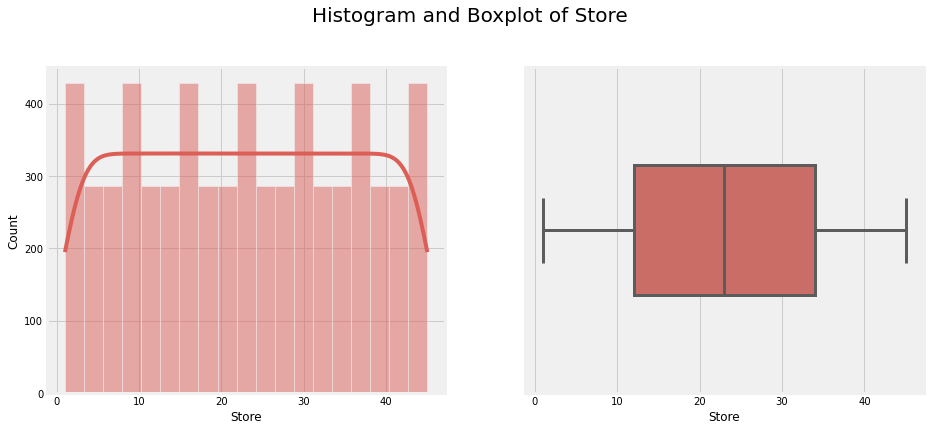

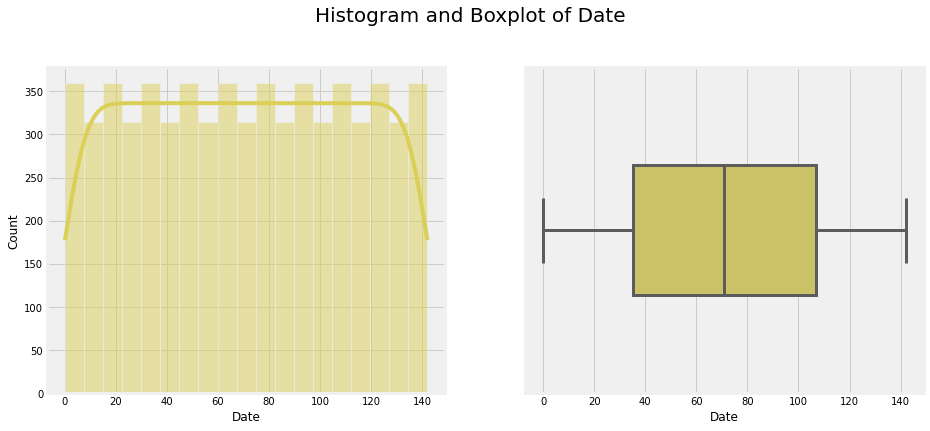

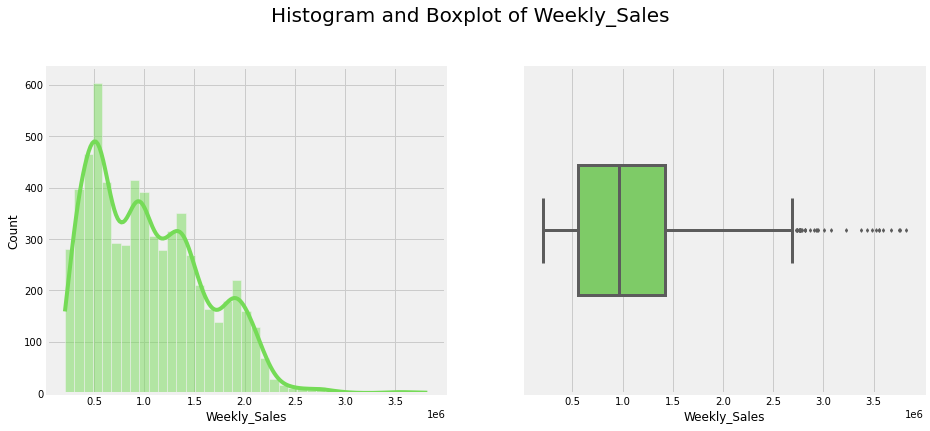

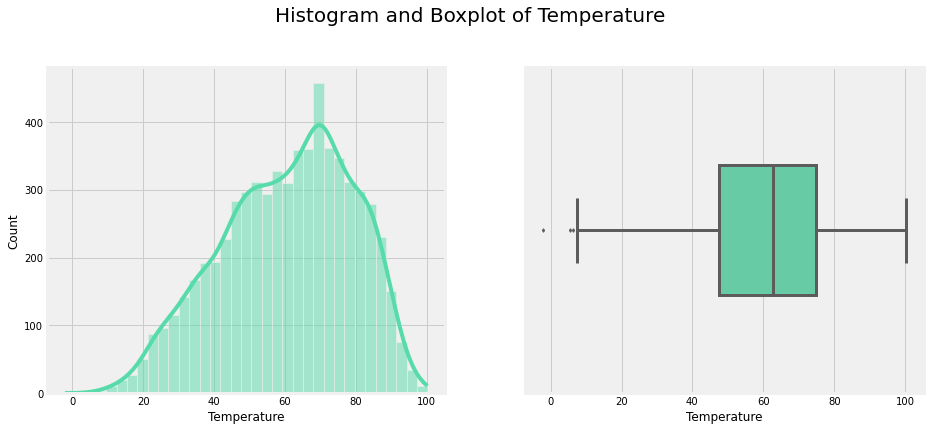

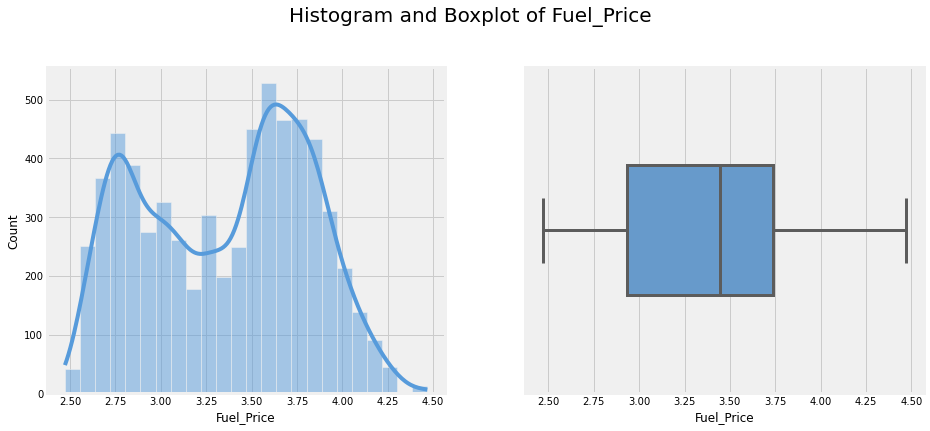

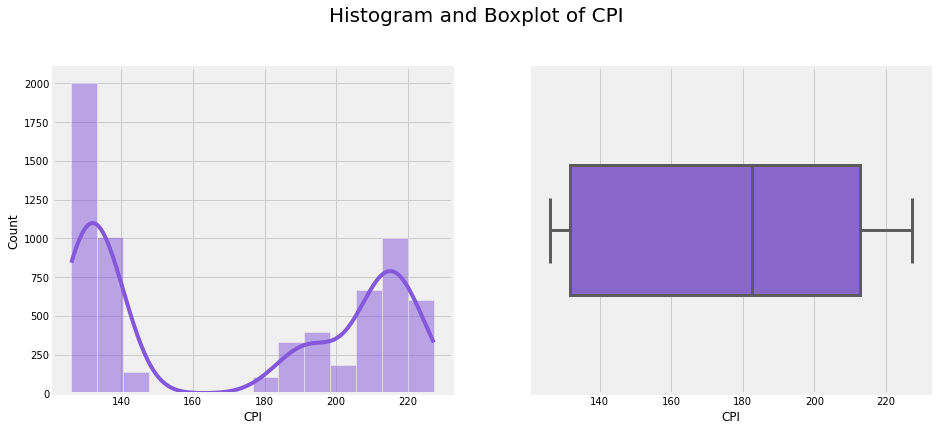

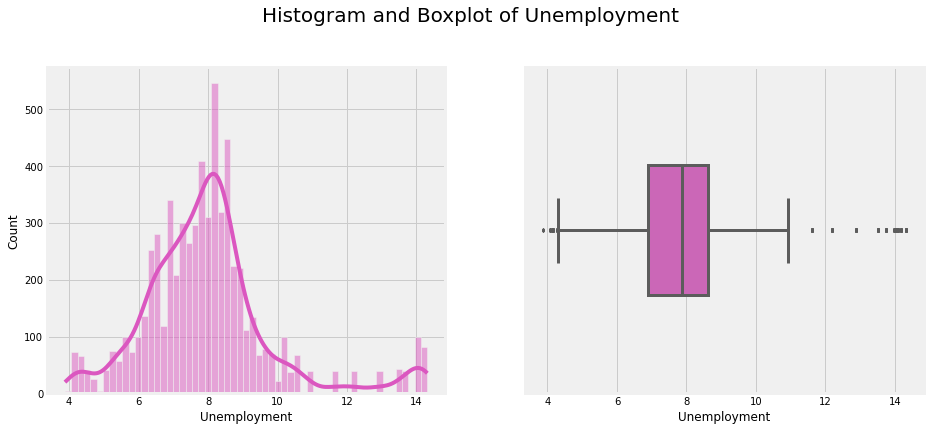

----------------------------------------------------------------------------------------------------
Countplot(s):



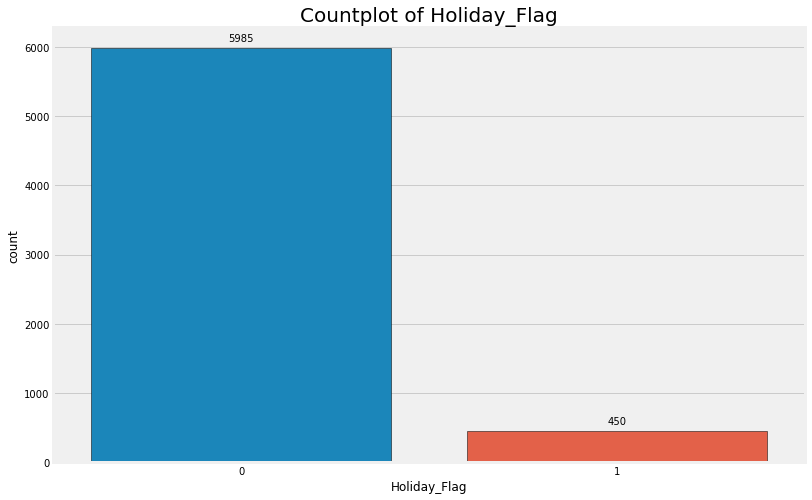

In [9]:
fast_eda(df)

## Preprocessing ||

In [10]:
df_transformed = df.drop("Holiday_Flag", axis = 1)
df_transformed.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1,19,1643690.900,42.310,2.572,211.096,8.106
1,1,52,1641957.440,38.510,2.548,211.242,8.106
2,1,85,1611968.170,39.930,2.514,211.289,8.106
3,1,118,1409727.590,46.630,2.561,211.320,8.106
4,1,20,1554806.680,46.500,2.625,211.350,8.106


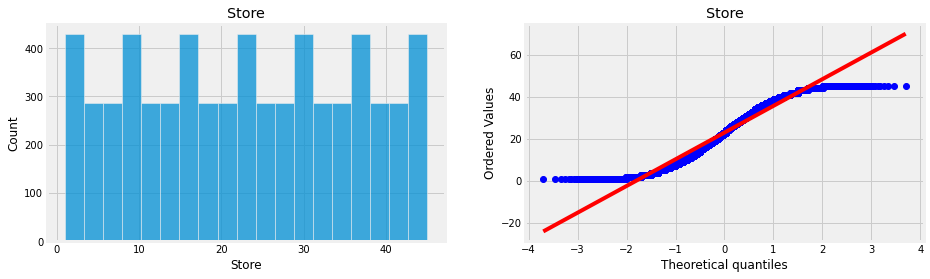

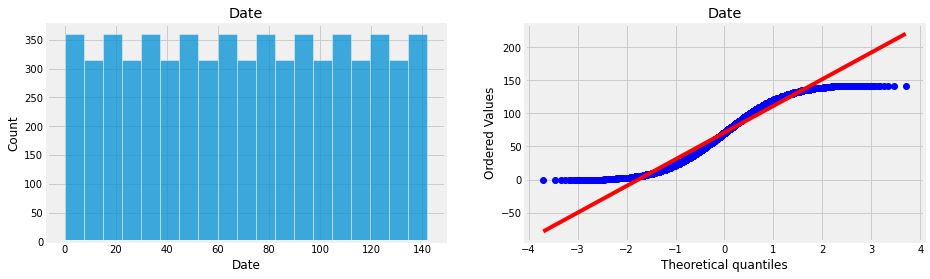

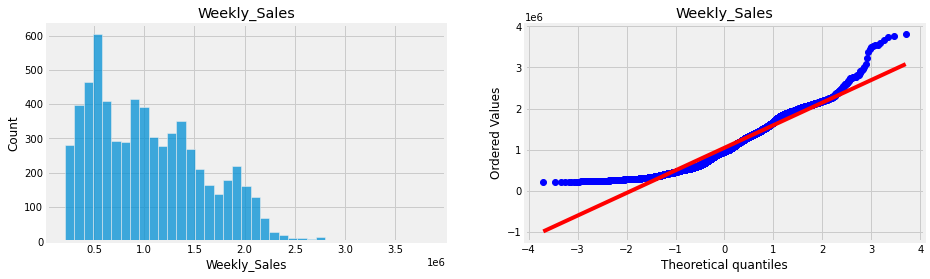

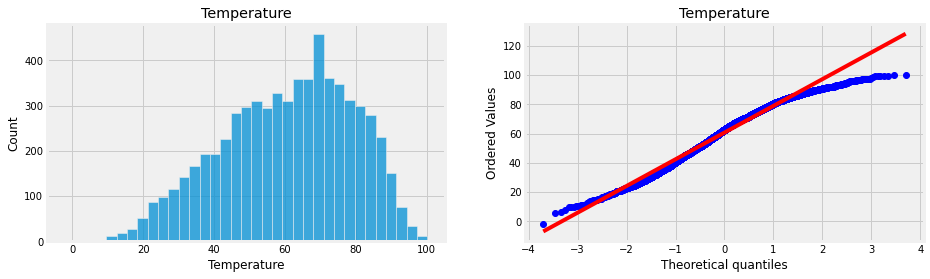

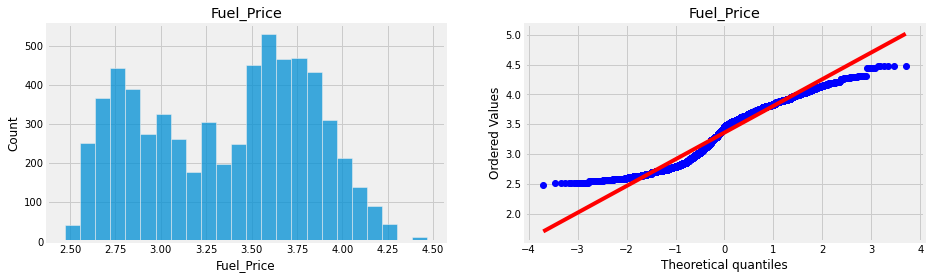

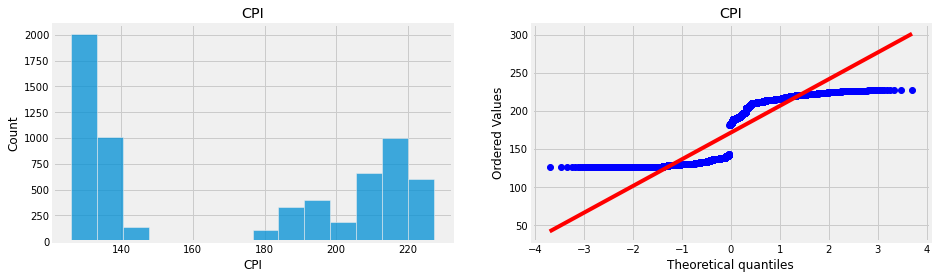

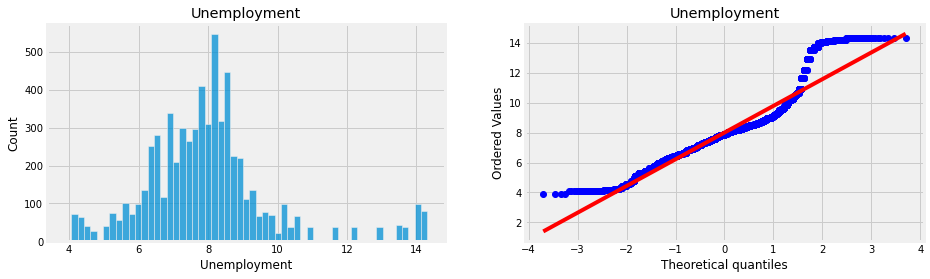

In [11]:
for column in df_transformed.columns : 
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(df_transformed[column])
    plt.title(column)
    
    plt.subplot(122)
    stats.probplot(df_transformed[column],dist = 'norm', plot = plt)
    plt.title(column)
    plt.show()

In [12]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

for col in df_transformed.columns:
    df_transformed[col] = df_transformed[col] = qt.fit_transform(pd.DataFrame(df_transformed[col]))

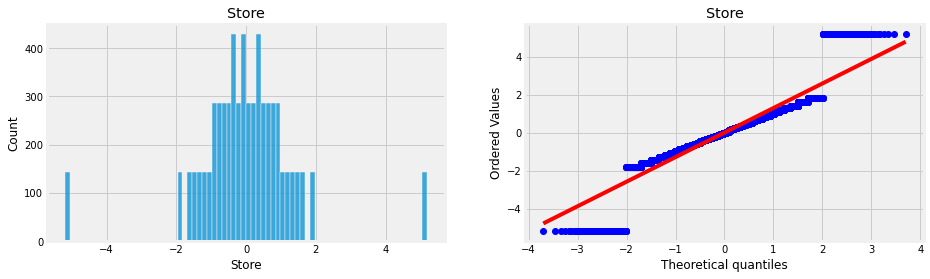

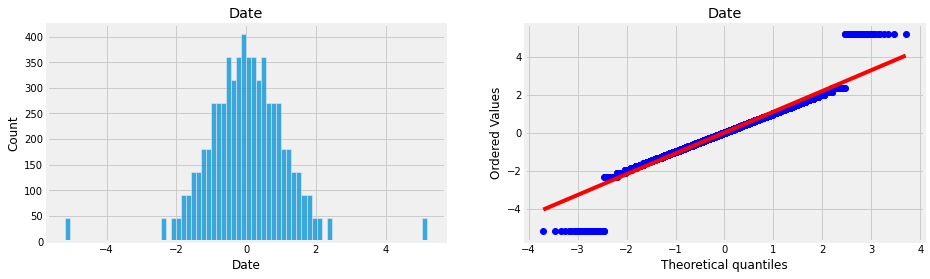

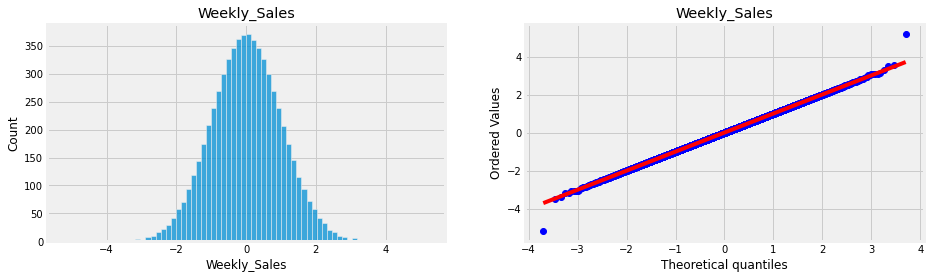

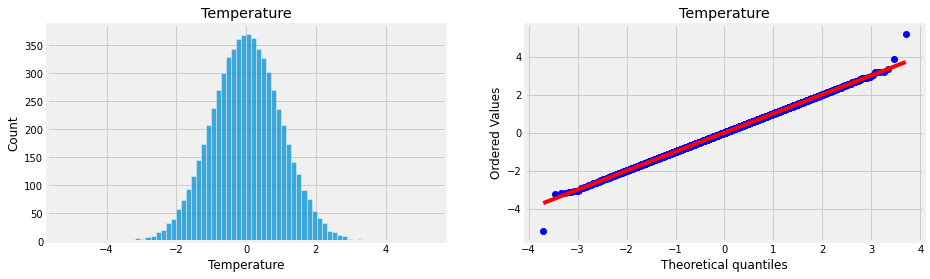

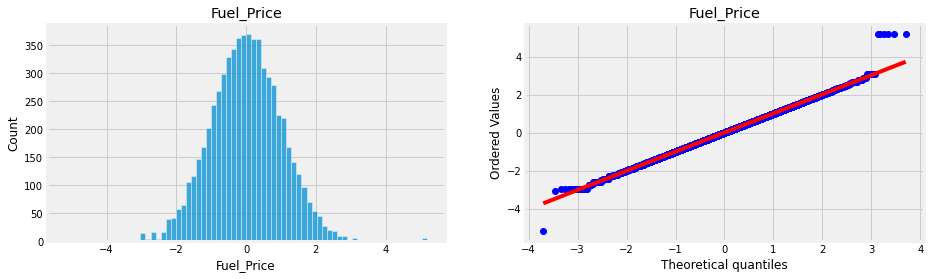

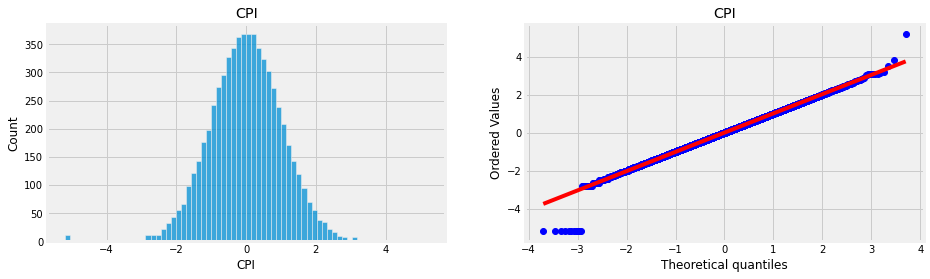

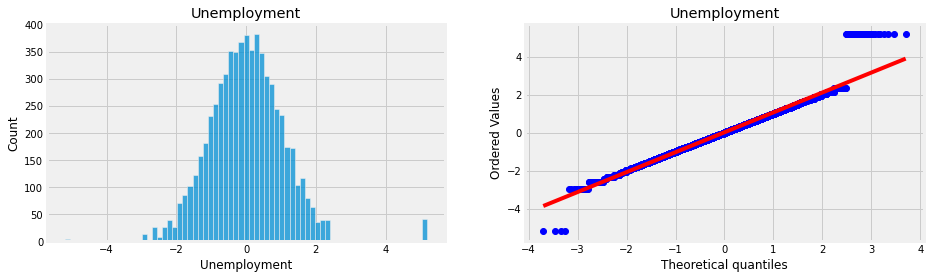

In [13]:
for column in df_transformed.columns : 
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(df_transformed[column])
    plt.title(column)
    
    plt.subplot(122)
    stats.probplot(df_transformed[column],dist = 'norm', plot = plt)
    plt.title(column)
    plt.show()

## Outliers

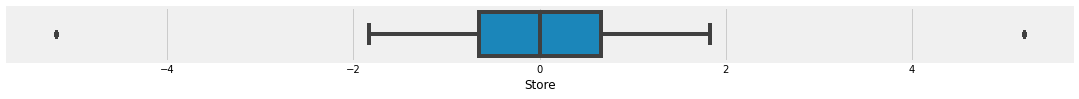

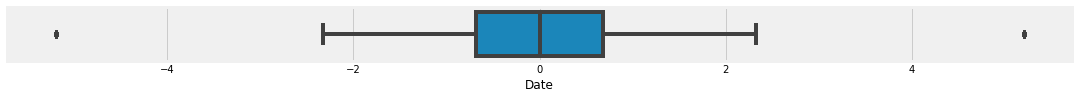

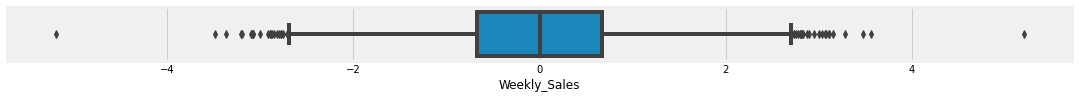

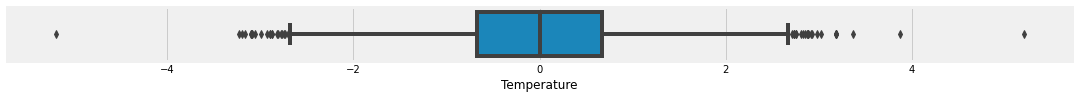

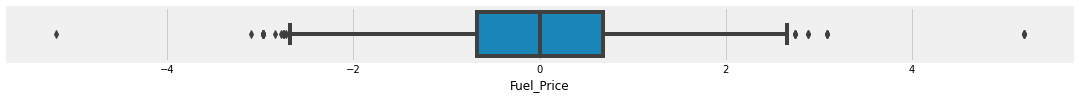

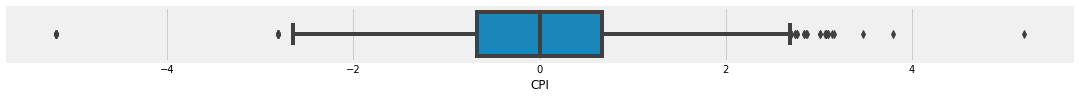

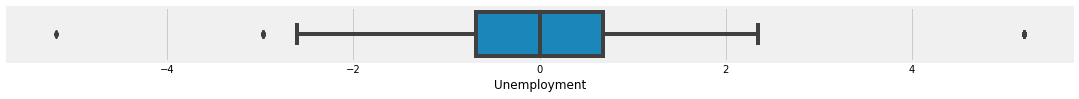

In [14]:
for column in df_transformed:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df_transformed, x = column)

In [15]:
for col in df_transformed:
    q1 = df_transformed[col].quantile(0.25)
    q3 = df_transformed[col].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - (whisker_width * iqr)
    upper_whisker = q3 + whisker_width * iqr
    df_transformed[col] = np.where(df_transformed[col] > upper_whisker, upper_whisker, np.where(df_transformed[col] < lower_whisker, lower_whisker, df_transformed[col]))

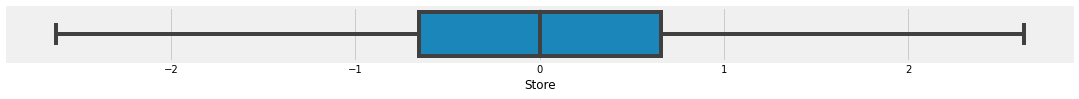

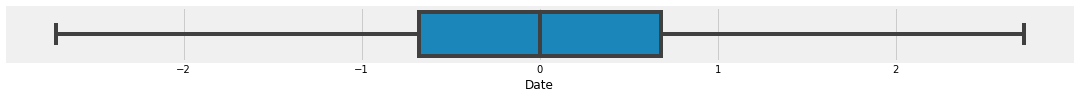

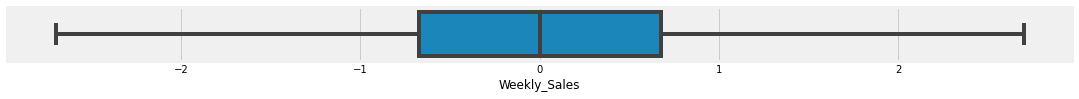

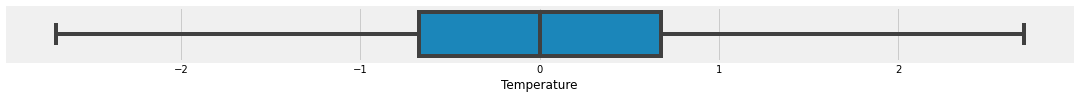

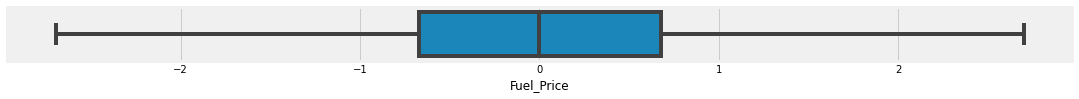

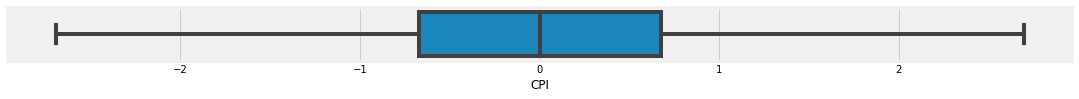

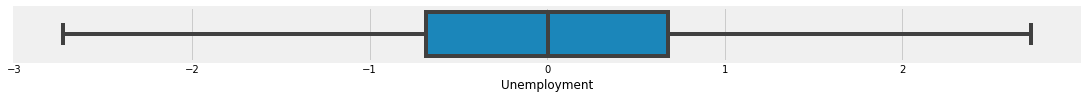

In [16]:
for column in df_transformed:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df_transformed, x = column)

In [17]:
df_transformed["Holiday_Flag"] = df[["Holiday_Flag"]]
df_transformed.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag
0,-2.626,-1.098,0.969,-0.918,-2.226,0.556,0.182,0
1,-2.626,-0.339,0.966,-1.082,-2.612,0.578,0.182,1
2,-2.626,0.247,0.928,-1.027,-2.697,0.584,0.182,0
3,-2.626,0.950,0.654,-0.710,-2.432,0.587,0.182,0
4,-2.626,-1.066,0.866,-0.719,-1.780,0.589,0.182,0


# Machine Learning

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tabulate import tabulate

In [19]:
# Extract features and target
X = df_transformed.drop("Unemployment", axis = 1)
Y = df_transformed["Unemployment"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Linear Regression

In [20]:
regLR = LinearRegression()
regLR.fit(X_train,Y_train)
yPredRegLR=regLR.predict(X_test)
mean_squared_error(yPredRegLR, Y_test)

0.7825562472291134

## Support Vector Regression

In [21]:
regSVR=SVR(kernel='linear')
regSVR.fit(X_train,Y_train)
yPredRegSVR=regSVR.predict(X_test)
mean_squared_error(yPredRegSVR, Y_test)

0.8170519826736882

## Decision Tree Regression

In [22]:
regDTR=DecisionTreeRegressor()
regDTR.fit(X_train,Y_train)
yPredRegDTR=regDTR.predict(X_test)
mean_squared_error(yPredRegDTR, Y_test)

0.011688385657814186

## Random Forest Regression

In [23]:
regRFR=RandomForestRegressor()
regRFR.fit(X_train,Y_train)
yPredRegRFR=regRFR.predict(X_test)
mean_squared_error(yPredRegRFR, Y_test)

0.006387866341745552

## Model Evaluation

In [24]:
data=[
     ["Linear Regression",round(mean_absolute_error(yPredRegLR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegLR, Y_test)),2),round(r2_score(yPredRegLR, Y_test),2)],
     ["Support Vector Regression",round(mean_absolute_error(yPredRegSVR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegSVR, Y_test)),2),round(r2_score(yPredRegSVR, Y_test),2)],
     ["Decision Tree Regression",round(mean_absolute_error(yPredRegDTR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegDTR, Y_test)),2),round(r2_score(yPredRegDTR, Y_test),2)],
     ["Random Forest Regression",round(mean_absolute_error(yPredRegRFR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegRFR, Y_test)),2),round(r2_score(yPredRegRFR, Y_test),2)] 
    ]
columns=["Model Name","Mean Absolute Error","Root Mean Squared Error","R Squared Error"]

print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════════════════╤═══════════════════════╤═══════════════════════════╤═══════════════════╕
│ Model Name                │   Mean Absolute Error │   Root Mean Squared Error │   R Squared Error │
╞═══════════════════════════╪═══════════════════════╪═══════════════════════════╪═══════════════════╡
│ Linear Regression         │                  0.67 │                      0.88 │             -2.72 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Support Vector Regression │                  0.67 │                      0.9  │             -1.84 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Decision Tree Regression  │                  0.03 │                      0.11 │              0.99 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Random Forest Regression  │                  0.04 │                      0.08 │ 

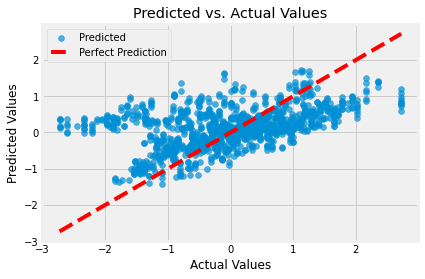

In [25]:
# Plotting the linear regression line
plt.scatter(Y_test, yPredRegSVR, alpha=0.7, label='Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()